# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier - Mwesigwa Musisi-Nkambwe

In this project, I undergo the task of identifying (Classifying) street signs.
The steps taken to complet this task are:

The steps of this project are the following:

Load the datasets for Testing, Traning and Validation from Pickle Files 
Explore, summarize and visualize the Datasets
Design, train and test a model architecture based on LeNet-5 Architecture  (https://www.kaggle.com/blurredmachine/lenet-architecture-a-complete-guide).
Use the newly generated model ( based of LeNet-5) to make predictions on new images
Analyze the softmax probabilities of the new images
Summarize the results with a write up that you are currently reading.

I will follow the following rubric points to mee the above goals.
[rubric points](https://review.udacity.com/#!/rubrics/481/view) 

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load/Verify The Data

In [2]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import pickle
from tensorflow.examples.tutorials.mnist import input_data
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

---

## Step 1: Dataset Summary & Exploration

The file `signnames.csv` contains id -> name mappings for each  of the 43 possible German signs we will analyze(below).


| **ClassId**      | **SignName**                        |
| -----------      | ------------------------------------|
| 0                |Speed limit (20km/h)                 |
| 1                |Speed limit (30km/h)                 |
| 2                |Speed limit (50km/h)                 |
| 3                |Speed limit (60km/h)                 | 
| 4                |Speed limit (70km/h)                 |
| 5                |Speed limit (80km/h)                 |
| 6                |End of speed limit (80km/h)          |
| 7                |Speed limit (100km/h)                |
| 8                |Speed limit (120km/h)                |
| 9                |No passing                           |
| 10               |for vehicles over 3.5 metric tons    |                  |
|11	               |Right-of-way at the next intersection|
|12	               |Priority road
|13	               |Yield
|14	               |Stop
|15	               |No vehicles
|16	               |Vehicles over 3.5 metric tons prohibited
|17	               |No entry
|18	               |General caution
|19	               |Dangerous curve to the left
|20	               |Dangerous curve to the right
|21	               |Double curve
|22	               |Bumpy road
|23	               |Slippery road
|24	               |Road narrows on the right
|25	               |Road work
|26	               |Traffic signals
|27	               |Pedestrians
|28	               |Children crossing
|29	               |Bicycles crossing
|30	               |Beware of ice/snow
|31	               |Wild animals crossing
|32	               |End of all speed and passing limits
|33	               |Turn right ahead
|34	               |Turn left ahead
|35	               |Ahead only
|36	               |Go straight or right
|37	               |Go straight or left
|38	               |Keep right
|39	               |Keep left
|40	               |Roundabout mandatory
|41      	       |End of no passing
|42	               |End of no passing by vehicles over 3.5 metric tons
 

**The pickled data is a dictionary with 4 key/value pairs:**

I loaded pickled data from files is: 
train.p has Training examples
test.p has Test Examples
valid.p has Validation Examples

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

The Datasets contain images of German street signs. By using python code I am able to anaylze the data I find that:

The code below is used to find the numbers above. I after loading the Training, Testing & Validation samples (Step 0) into their respective arrays. I then use the python len() built-in function find out how many elements are in each array and 
[pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) to get the dimensions of the training traffic sign image in position [0].


### Provide a Basic Summary of the Data Set Using Python, Lists, Numpy and/or Pandas

In [8]:
import pickle
import numpy as np

EPOCHS = 50
BATCH_SIZE = 20

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# determine the shape of an traffic sign image
image_shape = X_train[0].shape

# Number of unique classes/labels there are in the dataset.
n_classes = 43

# Printing out all relavant information before processing.
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

A visualiztion of the Dataset Distribution for Train, Test and Validation sets is created using [Matplotlib](http://matplotlib.org/)

I then visualize the German Traffic Signs Dataset found in the the pickled files loaded again using [Matplotlib](http://matplotlib.org/)[examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html)

Each image is matched with its Classid from `signnames.csv` file, labels are generatedusing the  plot_signs() functions. Text from the CSV file is generated with Numpy [np.genfromtxt()](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) function.


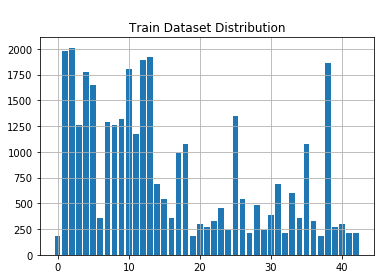

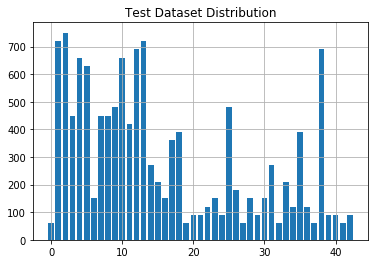

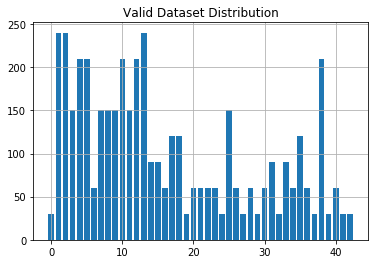

()

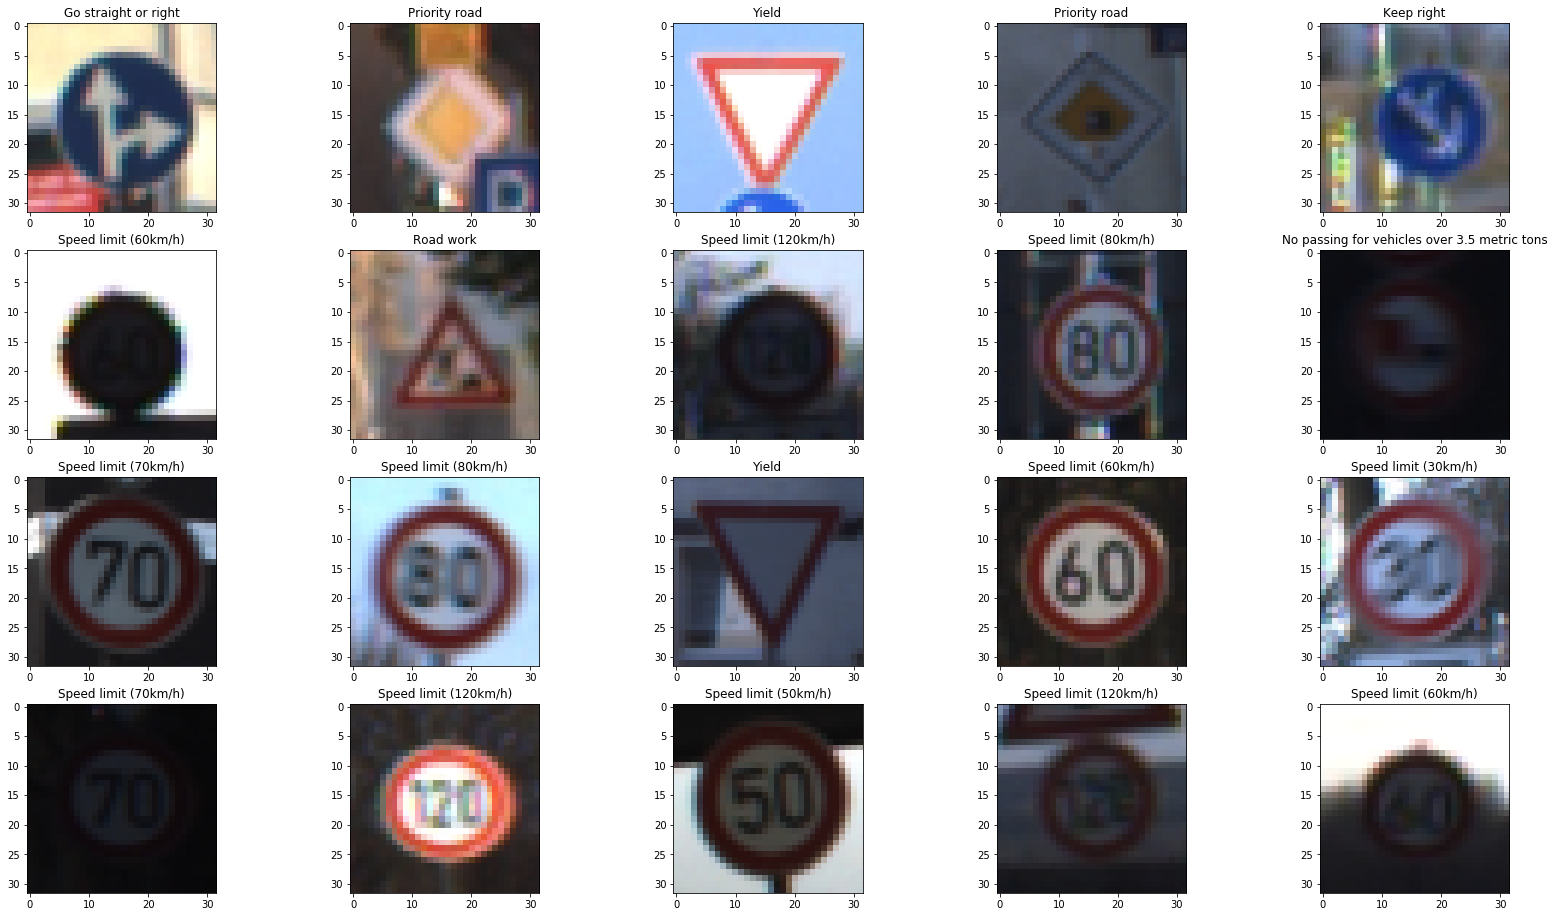

In [9]:
### Data exploration visualization
import pickle
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Visualizations shown in the notebook.
%matplotlib inline


def plot_signs(signs, nrows = 1, ncols=1, labels=None):   
    fig, axs = plt.subplots(ncols, nrows, figsize=(28, 16))
    axs = axs.ravel()
    for index, title in zip(range(len(signs)), signs):
        axs[index].imshow(signs[title])
        axs[index].set_title(labels[index], fontsize=12)
    return()
# Finding/Displaying Distribution of unique elements in train, test and validation arrays

train_unique, counts_train = np.unique(y_train, return_counts=True)
plt.bar(train_unique, counts_train)
plt.grid()
plt.title("\nTrain Dataset Distribution")
plt.show()

test_unique, counts_test = np.unique(y_test, return_counts=True)
plt.bar(test_unique, counts_test)
plt.grid()
plt.title("Test Dataset Distribution")
plt.show()

valid_unique, counts_valid = np.unique(y_valid, return_counts=True)
plt.bar(valid_unique, counts_valid)
plt.grid()
plt.title("Valid Dataset Distribution")
plt.show()

### Load the images and plot them here.

sign_text = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mystring','S55')], delimiter=',')

number_of_images_to_display = 20
signs = {}
labels = {}
for i in range(number_of_images_to_display):
    index = random.randint(0, n_train-1)
    labels[i] = sign_text[y_train[index]][1].decode('ascii')
    signs[i] = X_train[index]    
plot_signs(signs, 5, 4, labels)




----

## Step 2: Design and Test a Model Architecture

I designed and implemented a deep learning model that learns to recognize traffic signs using LeNet-5. Via transfer-learning I will modify for the datasets loaded.I then  
I trained and tested my model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

I used the LeNet-5 implementation described above. The adapted the LeNet-5 pre-trained neural network to a new, different data set. the final network I ended up using was.

| **Stage**               | **Action**                                                  |
| ------------------------| ----------------------------- ------------------------------|
| Layer 1                 | Convolution layer 1. The output shape is 28x28x6.           |
| Activation 1            | Activation 1. Relu & Droput Used here(My Addition)          |
| Pooling Layer 1         | The output shape should be 14x14x6.                         |
| Convolution layer 2     |Speed limit (60km/h)                                         | 
| Activation 2            |Speed limit (70km/h)                                         |
| Pooling layer 2         |Speed limit (80km/h)                                         |
| Flatten layer           |End of speed limit (80km/h)                                  |
| Fully connected layer 1 |Speed limit (100km/h)                                        |
| Activation 3            |Speed limit (120km/h)                                        |
| Fully connected layer 2 |No passing                                                   |
| Activation 4            |for vehicles over 3.5 metric tons                            |  
| Fully connected layer 3.|This will have 10 outputs.

You'll return the result of the final fully connected layer from the LeNet function.

If implemented correctly you should see output similar to the following:








With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Model Architecture

In [ ]:
### Training my model using the following architecture.
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation and dropout.
    conv1 = tf.nn.dropout((tf.nn.relu(conv1)), 0.9, noise_shape=None, seed=1, name=None)


    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv1 = tf.nn.dropout((conv1), 0.99, noise_shape=None, seed=None, name=None)
    

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout((conv2), 0.1, noise_shape=None, seed=None, name=None)
    

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    tf.nn.dropout((conv2), 0.99, noise_shape=None, seed=None, name=None)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    tf.nn.dropout((flatten(conv2)), 0.9, noise_shape=None, seed=1, name=None)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.dropout((tf.matmul(fc0, fc1_W) + fc1_b), 0.99, noise_shape=None, seed=1, name=None)
    
    # SOLUTION: Activation & dropout
    #fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout((tf.nn.relu(fc1)), 0.99, noise_shape=None, seed=1, name=None)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation & Dropout
    fc2 = tf.nn.dropout((tf.nn.relu(fc2)), 0.99, noise_shape=None, seed=5, name=None)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import pickle
from tensorflow.examples.tutorials.mnist import input_data
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2

### Calculate and report the accuracy on the training and validation set.
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def plot_signs(signs, nrows = 1, ncols=1, labels=None):   
    fig, axs = plt.subplots(ncols, nrows, figsize=(15, 8))
    axs = axs.ravel()
    for index, title in zip(range(len(signs)), signs):
        axs[index].imshow(signs[title])
        axs[index].set_title(labels[index], fontsize=10)
    return()


def normalize_image(image):
    return (image - 128.) / 128.
   

def gray_scale(image):
# Convert to grayscale
    gray_scale_image = np.sum(image/3, axis=3, keepdims=True)
    return gray_scale_image


### Load the images and plot them here.

sign_text = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mystring','S55')], delimiter=',')

number_of_images_to_display = 20
signs = {}
labels = {}
for i in range(number_of_images_to_display):
    index = random.randint(0, n_train-1)
    labels[i] = sign_text[y_train[index]][1].decode('ascii')
    signs[i] = X_train[index]    
plot_signs(signs, 5, 4, labels)


# Finding/Displaying Distribution of unique elements in train, test and validation arrays
      
train_unique, counts_train = np.unique(y_train, return_counts=True)
plt.bar(train_unique, counts_train)
plt.grid()
plt.title("\nTrain Dataset Distribution")
plt.show()

test_unique, counts_test = np.unique(y_test, return_counts=True)
plt.bar(test_unique, counts_test)
plt.grid()
plt.title("Test Dataset Distribution")
plt.show()

valid_unique, counts_valid = np.unique(y_valid, return_counts=True)
plt.bar(valid_unique, counts_valid)
plt.grid()
plt.title("Valid Dataset Distribution")
plt.show()

### Pre-processing pipeline

#Normalize images
X_train = normalize_image(X_train) 
X_valid = normalize_image(X_valid) 
X_test = normalize_image(X_test)

#Gray Scale images
X_train = gray_scale(X_train) 
X_valid = gray_scale(X_valid) 
X_test = gray_scale(X_test)

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


rate = 0.00065

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
   

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

I got my new images from https://routetogermany.com/drivingingermany/road-signs. For each of the new images i have printed out the model's softmax probabilities to show the **certainty** of the model's predictions I have limited the output to the top 5 probabilities for each image. 

I am using  [`tf.nn.top_k`] (https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k)to find the top k predictions for each image.




could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find 

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")